In [47]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.insert(0, '../')
from scripts_second_phase.tracking import MatchTracking 
from scripts_second_phase.pass_events import PassEvents

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# Relou de toujours devoir aller chercher le nom du match correspondant dans statsbomb : création d'un mapping
tracking_to_event  = {
    'g2312135' : 'ManCity_Arsenal',
    'g2312152' : 'ManCity_LeicesterCity',
    'g2312166' : 'ManCity_Liverpool',
    'g2312183' : 'ManCity_Brighton',
    'g2312201' : 'ManCity_AstonVilla',
    'g2312213' : 'ManCity_Tottenham'
}
event_to_tracking = {v: k for k, v in tracking_to_event.items()}

In [49]:
game = 'ManCity_Brighton'

In [50]:
match_tracking = MatchTracking(tracking_file=event_to_tracking[game], event_file=game)

##### On check que les équipes attaquent toujours bien vers la droite

Home team première mi temps

In [51]:
df_home = match_tracking.HomeTracking.df_tracking.copy()

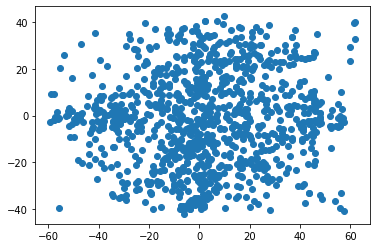

In [52]:
df_home1 = df_home[df_home['period']==1].sample(1000)
plt.scatter(df_home1.x,df_home1.y)
plt.show()

Home team deuxième mi temps

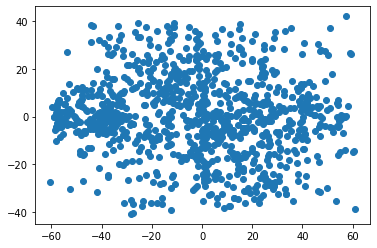

In [53]:
df_home2 = df_home[df_home['period']==2].sample(1000)
plt.scatter(df_home2.x,df_home2.y)
plt.show()

Away team première mi temps

In [54]:
df_away = match_tracking.AwayTracking.df_tracking.copy()

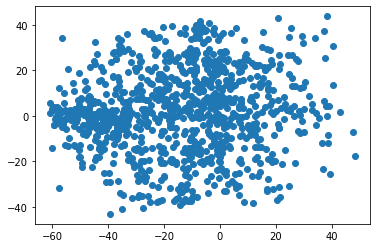

In [55]:
df_away1 = df_away[df_away['period']==1].sample(1000)
plt.scatter(df_away1.x,df_away1.y)
plt.show()

Away team deuxième mi temps

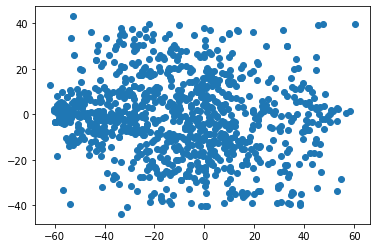

In [56]:
df_away2 = df_away[df_away['period']==2].sample(1000)
plt.scatter(df_away2.x,df_away2.y)
plt.show()

Les équipes attaquent toujours bien vers la droite

In [57]:
pass_events = PassEvents(event_file=game)
pass_events.df_pass_away

,period,gameClock,team.name,duration,x,y,end_location_x,end_location_y,player.id,player.name,pass.recipient.id,pass.recipient.name,player.jersey_nb,pass.recipient.jersey_nb,pass.body_part.name,pass.height.name,pass.outcome.name
51,1,59.554,Brighton & Hove Albion WFC,1.664182,-26.7,-40.0,-4.2,44.2,81579.0,Jorja Fox,24281.0,Danielle Carter,2,18.0,NaN,High Pass,NaN
76,1,101.647,Brighton & Hove Albion WFC,1.596441,33.5,39.9,49.6,-9.6,17274.0,Poppy Pattinson,24281.0,Danielle Carter,3,18.0,NaN,High Pass,Incomplete
82,1,104.794,Brighton & Hove Albion WFC,0.463712,43.3,35.2,36.4,3.6,17274.0,Poppy Pattinson,105102.0,Veatriki Sarri,3,7.0,Left Foot,Ground Pass,NaN
86,1,105.740,Brighton & Hove Albion WFC,0.827816,34.4,32.5,35.2,4.8,105102.0,Veatriki Sarri,17274.0,Poppy Pattinson,7,3.0,Right Foot,Ground Pass,NaN
89,1,106.790,Brighton & Hove Albion WFC,2.663273,35.2,37.2,3.6,36.4,17274.0,Poppy Pattinson,16400.0,Kayleigh Green,3,15.0,Left Foot,High Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2,2826.692,Brighton & Hove Albion WFC,2.462435,5.5,14.4,51.8,-11.8,17274.0,Poppy Pattinson,25453.0,Geum-Min Lee,3,9.0,Left Foot,High Pass,NaN
3952,2,2872.286,Brighton & Hove Albion WFC,1.242291,-36.6,22.7,-31.1,71.1,16395.0,Victoria Williams,17274.0,Poppy Pattinson,20,3.0,Right Foot,Ground Pass,NaN
3955,2,2873.528,Brighton & Hove Albion WFC,1.555247,-31.9,26.8,-39.8,79.8,17274.0,Poppy Pattinson,16400.0,Kayleigh Green,3,15.0,Right Foot,Ground Pass,NaN
3958,2,2877.974,Brighton & Hove Albion WFC,1.761956,-33.8,-7.4,-26.8,66.8,16400.0,Kayleigh Green,81579.0,Jorja Fox,15,2.0,Right Foot,Ground Pass,NaN


In [58]:
df_home = pass_events.df_pass_home.copy()

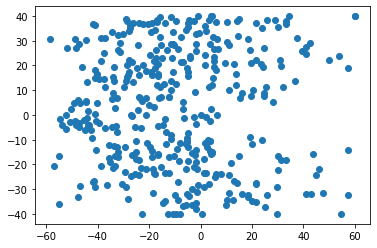

In [59]:
df_home1 = df_home[df_home['period']==1]
plt.scatter(df_home1.x,df_home1.y)
plt.show()

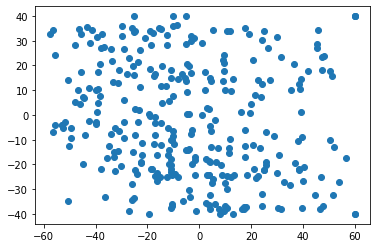

In [60]:
df_home2 = df_home[df_home['period']==2]
plt.scatter(df_home2.x,df_home2.y)
plt.show()

In [61]:
df_away = pass_events.df_pass_away.copy()

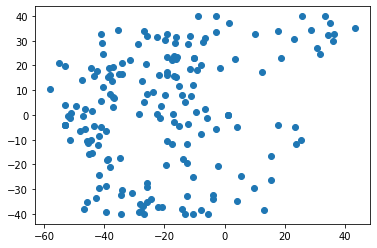

In [62]:
df_away1 = df_away[df_away['period']==1]
plt.scatter(df_away1.x,df_away1.y)
plt.show()

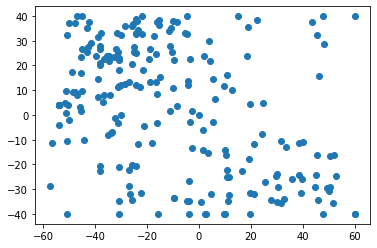

In [63]:
df_away2 = df_away[df_away['period']==2]
plt.scatter(df_away2.x,df_away2.y)
plt.show()

On ajoute la position du passeur et du receveur selon le tracking

In [64]:
pass_events.update_position(match_tracking=match_tracking)

On ajoute la position de toute l'équipe (home comme away) pour le calcul des features

In [65]:
pass_events.update_dataset_with_position(match_tracking=match_tracking)

In [66]:
df = pass_events.df_pass_home
df.head()

,period,gameClock,team.name,duration,pass.outcome.name,x,y,x_passer,y_passer,x_recipient,y_recipient,player.jersey_nb,pass.recipient.jersey_nb,coord_all_team,coord_all_adversary
0,1,0.685,Manchester City WFC,1.160998,NaN,0.0,0.0,1.134961,-0.363757,-11.326682,2.628439,21,25,"{25: [-11.326682072709184, 2.6284385108877513,...","{22: [-1.6852452071743422, -16.791497808394517..."
1,1,3.027,Manchester City WFC,1.585392,NaN,-12.4,7.4,-12.702392,0.844855,-24.808644,-8.237339,25,4,"{25: [-12.702392445912729, 0.8448552356424913,...","{22: [5.8582333392250945, -17.108318521760452,..."
2,1,4.613,Manchester City WFC,0.756572,NaN,-27.2,0.1,-27.422493,-6.442021,-16.680488,-1.267283,4,25,"{25: [-16.68048827509298, -1.2672828534637373,...","{22: [10.547112861227175, -16.779763707899484,..."
3,1,6.533,Manchester City WFC,1.417340,NaN,-21.2,-0.1,-20.945190,-5.045663,-25.863355,-28.419991,25,2,"{25: [-20.945190432023967, -5.045663212864879,...","{22: [9.45800881577437, -16.275197386612994, 2..."
4,2,8.124,Manchester City WFC,1.125473,NaN,10.0,10.1,11.177647,11.311673,13.355855,4.189074,12,10,"{25: [2.063565559805317, 8.577627461870295, 3....","{22: [1.4330316387536923, -25.76808468709599, ..."


In [67]:
df['x_passer_check'] = df.apply(lambda row: row['coord_all_team'][row['player.jersey_nb']][0], axis =1)
df['y_passer_check'] = df.apply(lambda row: row['coord_all_team'][row['player.jersey_nb']][1], axis =1)
df['x_recipient_check'] = df.apply(lambda row: row['coord_all_team'][row['pass.recipient.jersey_nb']][0] if pd.isna(row['pass.recipient.jersey_nb']) == False else np.nan, axis =1)
df['y_recipient_check'] = df.apply(lambda row: row['coord_all_team'][row['pass.recipient.jersey_nb']][1] if pd.isna(row['pass.recipient.jersey_nb']) == False else np.nan, axis =1)

In [68]:
(df['x_passer'] - df['x_passer_check']).abs().max()

0.0

In [69]:
(df['y_passer'] - df['y_passer_check']).abs().mean()

0.0

In [70]:
(df['x_recipient'] - df['x_recipient_check']).abs().mean()

0.0

In [71]:
(df['y_recipient'] - df['y_recipient_check']).abs().mean()

0.0

L'erreur est toujours nulle, check passed

(-40.0, 40.0)

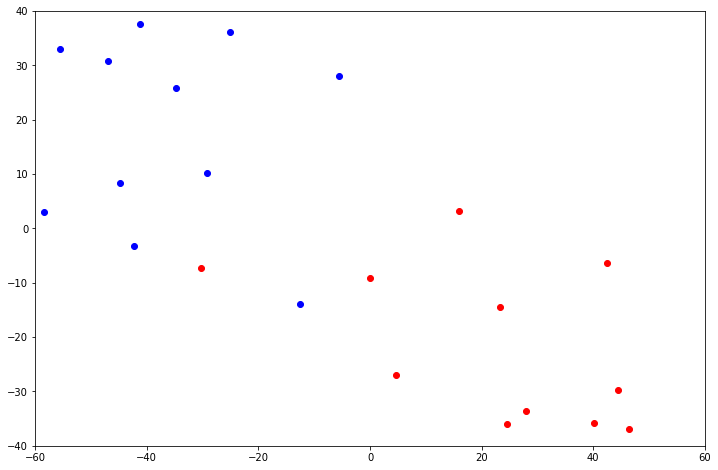

In [72]:
i = -167
coord1 = pass_events.df_pass_home['coord_all_team'].iloc[i]
coord2 = pass_events.df_pass_home['coord_all_adversary'].iloc[i]
plt.figure(figsize=(12,8))
plt.scatter([val[0] for _,val in coord1.items()], [val[1] for _,val in coord1.items()], c ='b')
plt.scatter([val[0] for _,val in coord2.items()], [val[1] for _,val in coord2.items()], c ='r')
plt.xlim(-60,60)
plt.ylim(-40,40)

(-40.0, 40.0)

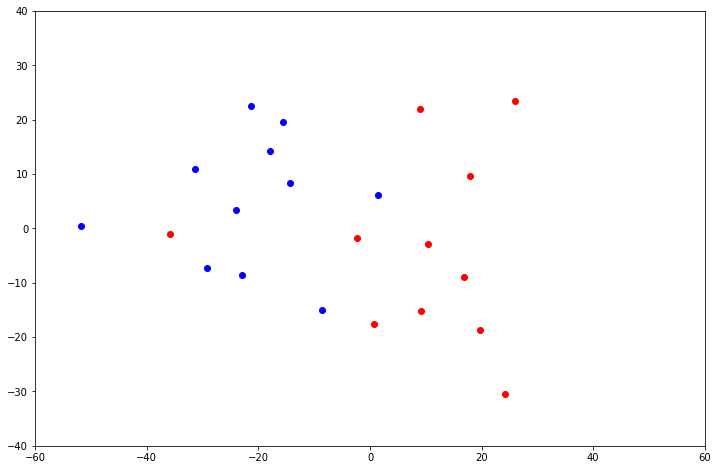

In [73]:
i = -167
coord1 = pass_events.df_pass_away['coord_all_team'].iloc[i]
coord2 = pass_events.df_pass_away['coord_all_adversary'].iloc[i]
plt.figure(figsize=(12,8))
plt.scatter([val[0] for _,val in coord1.items()], [val[1] for _,val in coord1.items()], c ='b')
plt.scatter([val[0] for _,val in coord2.items()], [val[1] for _,val in coord2.items()], c ='r')
plt.xlim(-60,60)
plt.ylim(-40,40)

Il faut flip les adversaires

In [74]:
pass_events.flip_coord_adversary()

(-40.0, 40.0)

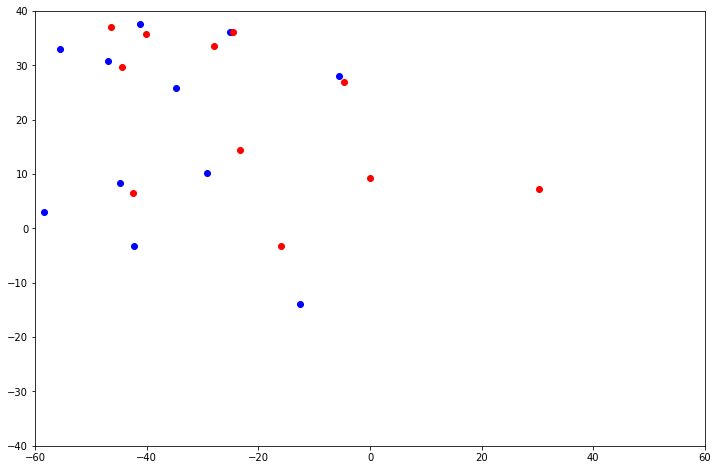

In [75]:
i = -167
coord1 = pass_events.df_pass_home['coord_all_team'].iloc[i]
coord2 = pass_events.df_pass_home['coord_all_adversary'].iloc[i]
plt.figure(figsize=(12,8))
plt.scatter([val[0] for _,val in coord1.items()], [val[1] for _,val in coord1.items()], c ='b')
plt.scatter([val[0] for _,val in coord2.items()], [val[1] for _,val in coord2.items()], c ='r')
plt.xlim(-60,60)
plt.ylim(-40,40)

(-40.0, 40.0)

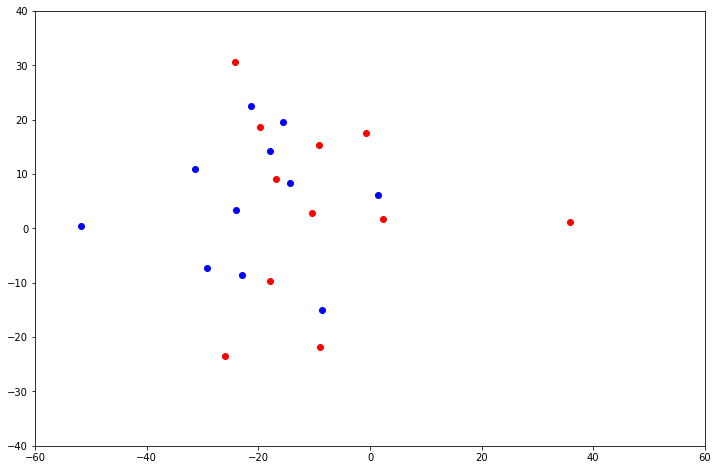

In [76]:
i = -167
coord1 = pass_events.df_pass_away['coord_all_team'].iloc[i]
coord2 = pass_events.df_pass_away['coord_all_adversary'].iloc[i]
plt.figure(figsize=(12,8))
plt.scatter([val[0] for _,val in coord1.items()], [val[1] for _,val in coord1.items()], c ='b')
plt.scatter([val[0] for _,val in coord2.items()], [val[1] for _,val in coord2.items()], c ='r')
plt.xlim(-60,60)
plt.ylim(-40,40)

In [77]:
match_tracking.BallTrackingHome.df_tracking

,period,gameClock,xyz,speed,x,y,z
0,1.0,0.00,"[-0.28, 0.09, 0.29]",9.29,-0.320999,0.105607,0.29
1,1.0,0.04,"[-0.7000000000000001, 0.21, 0.29]",9.13,-0.802498,0.246416,0.29
2,1.0,0.08,"[-1.1, 0.32, 0.29]",8.97,-1.261068,0.375491,0.29
3,1.0,0.12,"[-1.5, 0.44, 0.29]",8.81,-1.719638,0.516300,0.29
4,1.0,0.16,"[-1.9100000000000001, 0.52, 0.29]",8.65,-2.189672,0.610173,0.29
...,...,...,...,...,...,...,...
143051,2.0,2893.64,"[0, 0, -10]",0.00,-0.000000,-0.000000,-10.00
143052,2.0,2893.68,"[0, 0, -10]",0.00,-0.000000,-0.000000,-10.00
143053,2.0,2893.72,"[0, 0, -10]",0.00,-0.000000,-0.000000,-10.00
143054,2.0,2893.76,"[0, 0, -10]",0.00,-0.000000,-0.000000,-10.00


In [78]:
match_tracking.BallTrackingAway.df_tracking.describe()

,period,gameClock,speed,x,y,z
count,143056.000000,143056.000000,143056.000000,143056.000000,143056.000000,143056.000000
mean,1.505718,1430.727094,4.237589,-1.477411,-0.037977,-2.070801
std,0.499969,826.261061,4.592542,27.552193,20.799680,4.740686
min,1.000000,0.000000,0.000000,-65.793349,-45.716056,-10.000000
25%,1.000000,715.270000,0.000000,-19.007732,-13.071788,-10.000000
50%,2.000000,1430.540000,3.020000,0.000000,0.000000,0.270000
75%,2.000000,2145.810000,6.560000,15.155743,13.846239,0.340000
max,2.000000,2893.800000,29.780000,65.346243,48.473569,12.540000


In [79]:
df = pass_events.df_pass_home

In [80]:
df

,period,gameClock,team.name,duration,pass.outcome.name,x,y,x_passer,y_passer,x_recipient,y_recipient,player.jersey_nb,pass.recipient.jersey_nb,coord_all_team,coord_all_adversary,x_passer_check,y_passer_check,x_recipient_check,y_recipient_check
0,1,0.685,Manchester City WFC,1.160998,NaN,0.0,0.0,1.134961,-0.363757,-11.326682,2.628439,21,25,"{25: [-11.326682072709184, 2.6284385108877513,...","{22: [1.6852452071743422, 16.791497808394517, ...",1.134961,-0.363757,-11.326682,2.628439
1,1,3.027,Manchester City WFC,1.585392,NaN,-12.4,7.4,-12.702392,0.844855,-24.808644,-8.237339,25,4,"{25: [-12.702392445912729, 0.8448552356424913,...","{22: [-5.8582333392250945, 17.108318521760452,...",-12.702392,0.844855,-24.808644,-8.237339
2,1,4.613,Manchester City WFC,0.756572,NaN,-27.2,0.1,-27.422493,-6.442021,-16.680488,-1.267283,4,25,"{25: [-16.68048827509298, -1.2672828534637373,...","{22: [-10.547112861227175, 16.779763707899484,...",-27.422493,-6.442021,-16.680488,-1.267283
3,1,6.533,Manchester City WFC,1.417340,NaN,-21.2,-0.1,-20.945190,-5.045663,-25.863355,-28.419991,25,2,"{25: [-20.945190432023967, -5.045663212864879,...","{22: [-9.45800881577437, 16.275197386612994, [...",-20.945190,-5.045663,-25.863355,-28.419991
4,2,8.124,Manchester City WFC,1.125473,NaN,10.0,10.1,11.177647,11.311673,13.355855,4.189074,12,10,"{25: [2.063565559805317, 8.577627461870295, 3....","{22: [-1.4330316387536923, 25.76808468709599, ...",11.177647,11.311673,13.355855,4.189074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,2821.359,Manchester City WFC,0.627646,NaN,44.8,-24.2,43.036806,-29.147506,45.455764,-20.874965,10,9,"{25: [18.514768772697703, -24.066640115315973,...","{22: [26.84928078368918, 8.847511773256091, [1...",43.036806,-29.147506,45.455764,-20.874965
692,2,2866.296,Manchester City WFC,0.312224,NaN,1.0,-0.1,9.194331,-0.422428,-22.378222,-11.980517,21,4,"{14: [-11.464253110029539, -26.10837360145199,...","{22: [3.4278116798988325, 15.711960562851333, ...",9.194331,-0.422428,-22.378222,-11.980517
693,2,2882.368,Manchester City WFC,1.476129,NaN,-4.6,20.4,-1.318389,27.223113,7.738371,28.783749,5,25,"{14: [-1.364246120093515, -9.011789180186575, ...","{22: [-1.7884234851646081, 31.799412341543775,...",-1.318389,27.223113,7.738371,28.783749
694,2,2883.844,Manchester City WFC,0.991883,NaN,9.6,24.4,8.907725,29.769413,7.405908,31.236176,25,5,"{14: [-0.4929628837312702, -6.899651091080346,...","{22: [0.6076054148315656, 32.15143535639481, [...",8.907725,29.769413,7.405908,31.236176


In [81]:
df['period'] = df['period'].astype('Int32')
match_tracking.BallTrackingHome.df_tracking['period'] = match_tracking.BallTrackingHome.df_tracking['period'].astype('Int32')
test_merge = pd.merge_asof(df.sort_values(by = ['gameClock', 'period']),
              match_tracking.BallTrackingHome.df_tracking.sort_values(by = ['gameClock', 'period']),
              on = 'gameClock', by = 'period', direction = 'nearest', suffixes = ('','_ball'))

In [82]:
np.sqrt((test_merge['x'] - test_merge['x_ball'])**2 + (test_merge['y'] - test_merge['y_ball'])**2)

0       6.769199
1      12.891466
2       7.880257
3      17.862686
4       4.543426
         ...    
691     2.596588
692    24.613948
693     8.815997
694     8.010510
695     8.869896
Length: 696, dtype: float64

(array([ 34., 106., 128., 130., 119.,  81.,  56.,  26.,  12.,   4.]),
 array([ 0.51778895,  2.94081266,  5.36383637,  7.78686008, 10.20988379,
        12.63290751, 15.05593122, 17.47895493, 19.90197864, 22.32500235,
        24.74802607]),
 <BarContainer object of 10 artists>)

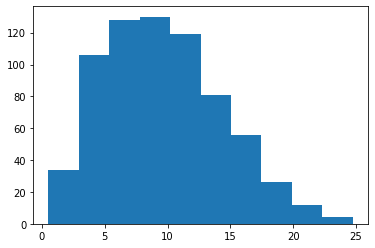

In [83]:
plt.hist(np.sqrt((test_merge['x'] - test_merge['x_ball'])**2 + (test_merge['y'] - test_merge['y_ball'])**2))

In [84]:
df.dtypes
match_tracking.BallTrackingAway.df_tracking.dtypes

period       float64
gameClock    float64
xyz           object
speed        float64
x            float64
y            float64
z            float64
dtype: object

In [85]:
pass_events.clean_dataset()

In [86]:
# Calcul des features
pass_events.set_df_for_model()

In [87]:
pass_events.df_model

,period,gameClock,team.name,x_passer,y_passer,x_recipient,y_recipient,player.jersey_nb,pass.recipient.jersey_nb,coord_all_team,coord_all_adversary,completed,distance_sideline,distance_goal,distance_opponent,speed_passer,opponents_closer_to_goal,distance_receiver_sideline,distance_receiver_goal,distance_receiver_opponent,opponents_closer_to_goal_receiver,speed_receiver,bypassed_opponents,angle,opponents_in_path,nearest_defender_pass_line,distance_pass
0,1,0.685,Manchester City WFC,1.134961,-0.363757,-11.326682,2.628439,21,25,"{25: [-11.326682072709184, 2.6284385108877513,...","{22: [1.6852452071743422, 16.791497808394517, ...",1,39.636243,58.866163,7.344693,2.17,7,37.371561,71.375096,12.373016,11,1.23,0,166.498175,0,0.228458,12.815841
1,1,3.027,Manchester City WFC,-12.702392,0.844855,-24.808644,-8.237339,25,4,"{25: [-12.702392445912729, 0.8448552356424913,...","{22: [-5.8582333392250945, 17.108318521760452,...",1,39.155145,72.707301,2.921853,2.33,10,31.762661,85.207745,9.938881,11,1.52,0,-143.122515,1,0.385000,15.134317
2,1,4.613,Manchester City WFC,-27.422493,-6.442021,-16.680488,-1.267283,4,25,"{25: [-16.68048827509298, -1.2672828534637373,...","{22: [-10.547112861227175, 16.779763707899484,...",1,32.577507,87.659523,3.902426,1.48,11,38.732717,76.690960,6.004444,8,2.50,2,25.721478,1,2.290489,11.923447
3,1,6.533,Manchester City WFC,-20.945190,-5.045663,-25.863355,-28.419991,25,2,"{25: [-20.945190432023967, -5.045663212864879,...","{22: [-9.45800881577437, 16.275197386612994, [...",1,34.954337,81.102297,6.015966,2.45,10,11.580009,90.444522,13.087508,11,2.10,0,-101.882211,1,0.708310,23.886137
4,2,8.124,Manchester City WFC,11.177647,11.311673,13.355855,4.189074,12,10,"{25: [2.063565559805317, 8.577627461870295, 3....","{22: [-1.4330316387536923, 25.76808468709599, ...",1,28.688327,50.115627,3.592298,3.61,5,35.810926,46.831876,7.366694,4,4.97,2,-72.995505,1,1.448839,7.448222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2826.692,Brighton & Hove Albion WFC,9.664365,12.297337,39.058710,-11.945314,3,9,"{22: [37.77471399754733, -20.49947356482545, 4...","{14: [36.146790055923134, 10.537222244541073, ...",1,27.702663,51.816027,10.317039,0.88,11,20.941290,24.108674,1.613447,4,4.49,9,-39.513719,6,1.050991,38.101623
391,2,2872.286,Brighton & Hove Albion WFC,-36.846109,18.821497,-29.761201,27.692477,20,3,"{22: [-8.609654085632183, -11.030054465332528,...","{14: [-5.640412530134533, 27.469529258876005, ...",1,21.178503,98.658085,1.660771,3.75,11,12.307523,93.935864,4.032191,10,3.57,1,51.386992,1,0.105931,11.352983
392,2,2873.528,Brighton & Hove Albion WFC,-33.601726,26.331322,-35.848719,6.512426,3,15,"{22: [-10.592969873667293, -10.842308857411973...","{14: [-11.017147238738385, 28.783748514319882,...",1,13.668678,97.234878,0.894050,1.10,10,24.151281,96.069708,11.832177,9,2.05,0,-96.468364,2,0.718041,19.945867
393,2,2877.974,Brighton & Hove Albion WFC,-33.578797,-12.168262,-34.255188,-21.989704,15,2,"{22: [-13.493425910504767, -20.37039845938007,...","{14: [-8.495011554531889, 19.98317314304393, [...",1,26.421203,94.366614,7.157542,4.58,11,18.010296,96.786299,11.904668,11,5.56,0,-93.939671,0,0.455218,9.844706


In [88]:
pd.set_option('display.max_columns', None)
display(pass_events.df_model.describe())

,period,gameClock,x_passer,y_passer,x_recipient,y_recipient,player.jersey_nb,pass.recipient.jersey_nb,completed,distance_sideline,distance_goal,distance_opponent,speed_passer,opponents_closer_to_goal,distance_receiver_sideline,distance_receiver_goal,distance_receiver_opponent,opponents_closer_to_goal_receiver,speed_receiver,bypassed_opponents,angle,opponents_in_path,nearest_defender_pass_line,distance_pass
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.475952,1424.965893,-10.786311,1.229000,-8.148695,1.109731,11.070140,12.020040,0.881764,16.256392,75.724572,5.409942,1.992094,9.564128,16.529995,72.930688,9.521322,8.569138,2.516754,1.515030,-0.111786,1.006012,2.759915,16.918337
std,0.499672,806.138875,26.291882,24.119214,26.581052,23.702421,9.639182,10.007199,0.323050,10.409181,23.457983,5.111159,1.211576,1.686395,10.244686,24.377705,6.659727,2.614812,1.569196,2.104414,93.678915,1.021319,3.834624,8.449211
min,1.000000,0.456000,-59.568259,-39.978080,-59.178475,-39.403109,1.000000,1.000000,0.000000,0.010186,14.548648,0.148088,0.000000,4.000000,-0.083687,6.454274,0.422344,1.000000,0.000000,0.000000,-179.676299,0.000000,0.000682,1.873981
25%,1.000000,748.896250,-31.492303,-20.496540,-29.013159,-18.595616,4.000000,4.000000,1.000000,7.564013,58.866303,1.875640,1.020000,9.000000,8.250361,56.674975,4.236225,7.000000,1.312500,0.000000,-78.831862,0.000000,0.463793,10.744696
50%,1.000000,1411.393500,-12.868624,1.020867,-10.014025,1.490231,9.000000,9.000000,1.000000,15.528533,77.140235,3.453345,1.750000,10.000000,15.352522,74.570393,7.947436,9.500000,2.215000,0.000000,2.911073,1.000000,1.196041,15.530403
75%,2.000000,2111.959250,5.683403,23.333259,10.673220,22.667349,15.000000,18.000000,1.000000,23.323182,94.383969,7.353959,2.790000,11.000000,24.217635,92.777604,13.399685,11.000000,3.470000,3.000000,73.894802,2.000000,3.044566,21.531750
max,2.000000,2886.150000,59.717294,39.989814,55.177450,40.083687,41.000000,41.000000,1.000000,40.000000,124.285921,37.003809,6.190000,11.000000,39.941329,119.708558,37.133012,11.000000,7.980000,10.000000,179.903862,8.000000,21.665786,56.648044


In [92]:
display(pass_events.df_model.head())

,period,gameClock,team.name,x_passer,y_passer,x_recipient,y_recipient,player.jersey_nb,pass.recipient.jersey_nb,coord_all_team,coord_all_adversary,completed,distance_sideline,distance_goal,distance_opponent,speed_passer,opponents_closer_to_goal,distance_receiver_sideline,distance_receiver_goal,distance_receiver_opponent,opponents_closer_to_goal_receiver,speed_receiver,bypassed_opponents,angle,opponents_in_path,nearest_defender_pass_line,distance_pass
0,1,0.685,Manchester City WFC,1.134961,-0.363757,-11.326682,2.628439,21,25,"{25: [-11.326682072709184, 2.6284385108877513,...","{22: [1.6852452071743422, 16.791497808394517, ...",1,39.636243,58.866163,7.344693,2.17,7,37.371561,71.375096,12.373016,11,1.23,0,166.498175,0,0.228458,12.815841
1,1,3.027,Manchester City WFC,-12.702392,0.844855,-24.808644,-8.237339,25,4,"{25: [-12.702392445912729, 0.8448552356424913,...","{22: [-5.8582333392250945, 17.108318521760452,...",1,39.155145,72.707301,2.921853,2.33,10,31.762661,85.207745,9.938881,11,1.52,0,-143.122515,1,0.385000,15.134317
2,1,4.613,Manchester City WFC,-27.422493,-6.442021,-16.680488,-1.267283,4,25,"{25: [-16.68048827509298, -1.2672828534637373,...","{22: [-10.547112861227175, 16.779763707899484,...",1,32.577507,87.659523,3.902426,1.48,11,38.732717,76.690960,6.004444,8,2.50,2,25.721478,1,2.290489,11.923447
3,1,6.533,Manchester City WFC,-20.945190,-5.045663,-25.863355,-28.419991,25,2,"{25: [-20.945190432023967, -5.045663212864879,...","{22: [-9.45800881577437, 16.275197386612994, [...",1,34.954337,81.102297,6.015966,2.45,10,11.580009,90.444522,13.087508,11,2.10,0,-101.882211,1,0.708310,23.886137
4,2,8.124,Manchester City WFC,11.177647,11.311673,13.355855,4.189074,12,10,"{25: [2.063565559805317, 8.577627461870295, 3....","{22: [-1.4330316387536923, 25.76808468709599, ...",1,28.688327,50.115627,3.592298,3.61,5,35.810926,46.831876,7.366694,4,4.97,2,-72.995505,1,1.448839,7.448222
